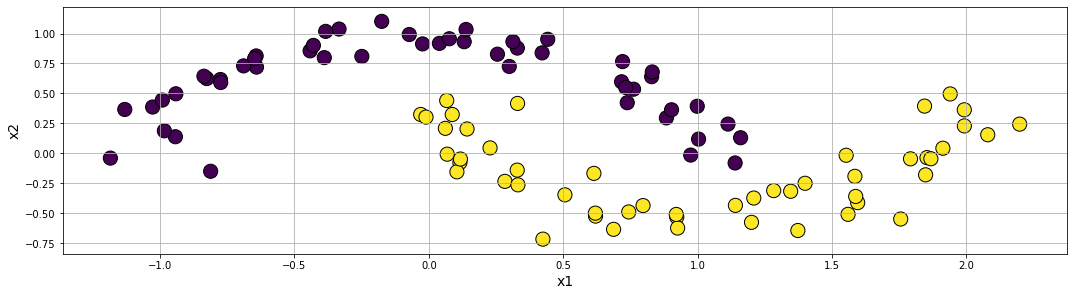

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=None)
X1 = data[0]
Y = data[1]
df = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,3)])
df['y'] = data[1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X1_df = pd.DataFrame(X1, columns=['dim'+ str(i) for i in range(1,3)])

from itertools import combinations
from math import ceil
lst_var=list(combinations(df.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [5]:
noise_feats = 10 
noise = np.random.rand(100, noise_feats)  #dim = 200x10
print(noise, noise.shape)
#Center the noise as well
noise -= noise.mean()
#Create a pandas dataframe for the noise dimensional data 
noise_df = pd.DataFrame(noise, columns=['dim'+ str(i) for i in range(1,noise_feats+1)])
print(noise_df)

[[6.81082637e-01 5.60063914e-01 7.76045171e-01 6.94304411e-01
  5.57324602e-01 6.99056124e-01 6.48821313e-01 7.54540717e-01
  4.26663773e-01 7.52829795e-01]
 [4.63115342e-01 5.61816569e-01 3.05513316e-01 7.16951418e-01
  1.60418933e-01 3.33559206e-01 3.21109903e-01 9.65798289e-01
  7.02890281e-01 6.64397977e-01]
 [9.35239427e-03 2.04537653e-01 5.43810771e-01 1.91656048e-01
  9.85234601e-01 1.11946464e-01 6.80571472e-01 8.54259611e-01
  3.70239881e-01 3.96221028e-01]
 [9.95810459e-01 7.08701012e-01 1.50026317e-01 1.89207008e-01
  8.53080532e-01 9.29089220e-01 2.51465914e-01 1.47903744e-01
  2.03338623e-01 1.85496133e-02]
 [8.89356092e-01 8.98538732e-01 3.58336341e-01 3.09823335e-01
  2.39002861e-01 3.71674196e-01 1.53290471e-02 2.26458256e-02
  3.11773117e-01 7.69966722e-01]
 [1.67460818e-01 8.52792768e-01 3.75119785e-01 9.70374301e-01
  8.81759231e-01 1.24289700e-01 6.87619105e-01 2.88001606e-01
  6.29781354e-01 4.74235239e-01]
 [3.98547492e-02 4.42134029e-01 9.69370940e-01 9.50355488e

In [6]:
#concatenate the noise dimensions to the original datset 
input_tot = pd.concat([X1_df, noise_df], axis=1) 
input_tot

,dim1,dim2,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
0,1.792687,-0.045787,0.180798,0.059780,0.275761,0.194020,0.057040,0.198772,0.148537,0.254256,-0.073621,0.252545
1,1.848810,-0.179219,-0.037169,0.061532,-0.194771,0.216667,-0.339865,-0.166725,-0.179174,0.465514,0.202606,0.164114
2,0.922701,-0.531036,-0.490932,-0.295747,0.043526,-0.308628,0.484950,-0.388338,0.180287,0.353975,-0.130044,-0.104063
3,0.329017,-0.139938,0.495526,0.208417,-0.350258,-0.311077,0.352796,0.428805,-0.248818,-0.352381,-0.296946,-0.481735
4,-0.811833,-0.149526,0.389072,0.398254,-0.141948,-0.190461,-0.261281,-0.128610,-0.484955,-0.477639,-0.188511,0.269682
5,0.061700,0.208837,-0.332824,0.352508,-0.125165,0.470090,0.381475,-0.375995,0.187335,-0.212283,0.129497,-0.026049
6,1.200954,-0.575669,-0.460430,-0.058150,0.469087,0.450071,-0.406705,-0.187687,0.077509,0.006209,-0.120040,-0.157467
7,-0.826185,0.624129,0.421354,0.329594,0.498044,-0.411519,0.115398,-0.266232,0.221847,0.411069,-0.229009,-0.473164
8,1.596132,-0.411200,0.302543,0.244627,0.353031,0.109956,0.136759,0.107964,0.126721,0.289758,-0.360468,0.053010
9,0.330349,0.416677,-0.015939,-0.203753,0.392138,0.258088,-0.268121,-0.117017,-0.109219,-0.347534,0.100041,0.244668


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_tot, Y, test_size=0.33)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Accuracy = []
Accuracy_D = []

std_clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF = metrics.accuracy_score(y_test, pred_test_std)
RF

0.8181818181818182

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF_D = metrics.accuracy_score(y_test, pred_test_std)
RF_D

0.7575757575757576

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Accuracy = [10]


std_clf = make_pipeline(StandardScaler(), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM1 = metrics.accuracy_score(y_test, pred_test_std)
SVM1

std_clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM = metrics.accuracy_score(y_test, pred_test_std)
SVM

std_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
KNN = metrics.accuracy_score(y_test, pred_test_std)
KNN

Accuracy = [RF, KNN, SVM, SVM1]
Accuracy

[0.8181818181818182,
 0.7878787878787878,
 0.7878787878787878,
 0.48484848484848486]

In [11]:
Accuracy_D = [10]

std_clf = make_pipeline(StandardScaler(),TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF_D = metrics.accuracy_score(y_test, pred_test_std)
RF_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM1_D = metrics.accuracy_score(y_test, pred_test_std)
SVM1_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM_D = metrics.accuracy_score(y_test, pred_test_std)
SVM_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
KNN_D = metrics.accuracy_score(y_test, pred_test_std)
KNN_D

Accuracy_D = [RF_D, KNN_D, SVM_D, SVM1_D]
Accuracy_D

[0.8484848484848485,
 0.8484848484848485,
 0.7272727272727273,
 0.8484848484848485]

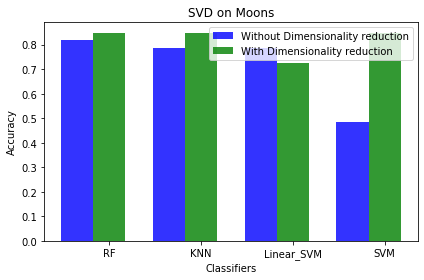

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.8181818181818182,
 0.7878787878787878,
 0.7878787878787878,
 0.48484848484848486)
Accuracy_D = (0.8484848484848485,
 0.8484848484848485,
 0.7272727272727273,
 0.8484848484848485)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('SVD on Moons')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
PAccuracy_D = [10]
from sklearn.decomposition import PCA

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PRF_D = metrics.accuracy_score(y_test, pred_test_std)
PRF_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PSVM1_D = metrics.accuracy_score(y_test, pred_test_std)
PSVM1_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PSVM_D = metrics.accuracy_score(y_test, pred_test_std)
PSVM_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PKNN_D = metrics.accuracy_score(y_test, pred_test_std)
PKNN_D

PAccuracy_D = [PRF_D, PKNN_D, PSVM_D, PSVM1_D]
PAccuracy_D

[0.8181818181818182,
 0.8484848484848485,
 0.7272727272727273,
 0.8484848484848485]

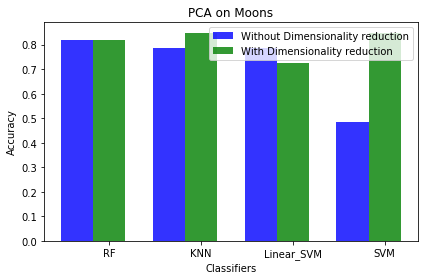

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.8181818181818182,
 0.7878787878787878,
 0.7878787878787878,
 0.48484848484848486)
Accuracy_D = (0.8181818181818182,
 0.8484848484848485,
 0.7272727272727273,
 0.8484848484848485)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('PCA on Moons')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MRF_D = metrics.accuracy_score(y_test, pred_test_std)
MRF_D

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MSVM1_D = metrics.accuracy_score(y_test, pred_test_std)
MSVM1_D

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MSVM_D = metrics.accuracy_score(y_test, pred_test_std)
MSVM_D

std_clf = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MKNN_D = metrics.accuracy_score(y_test, pred_test_std)
MKNN_D

MAccuracy_D = [MRF_D, MKNN_D, MSVM_D, MSVM1_D]
MAccuracy_D

/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/da_pj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarn

[0.7878787878787878,
 0.8484848484848485,
 0.8181818181818182,
 0.8484848484848485]

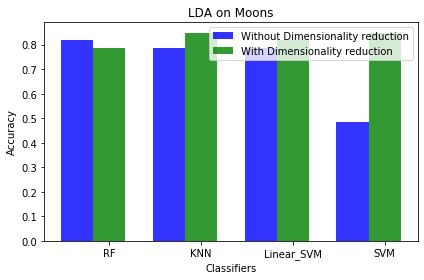

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.8181818181818182,
 0.7878787878787878,
 0.7878787878787878,
 0.48484848484848486)
Accuracy_D = (0.7878787878787878,
 0.8484848484848485,
 0.8181818181818182,
 0.8484848484848485)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('LDA on Moons')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()